In [133]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt



In [134]:
dataset=pd.read_csv('winequality-white.csv',sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


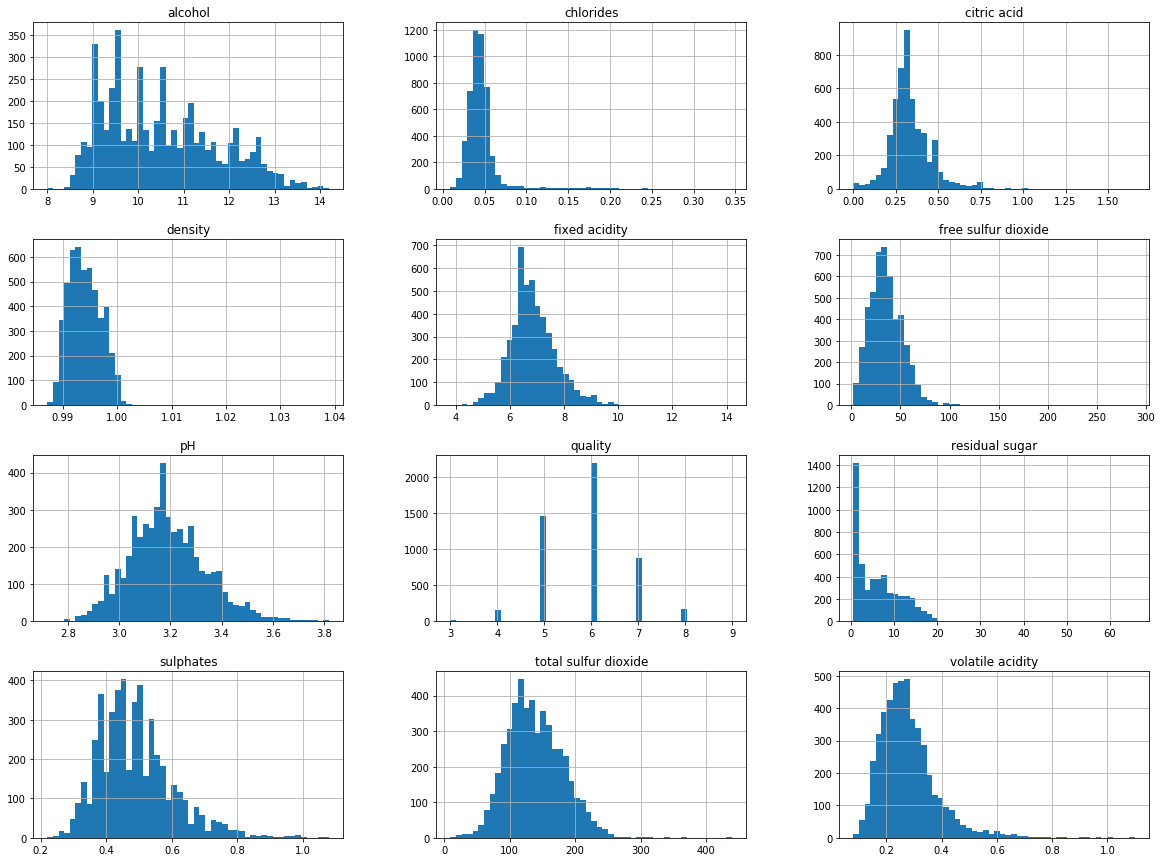

In [135]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

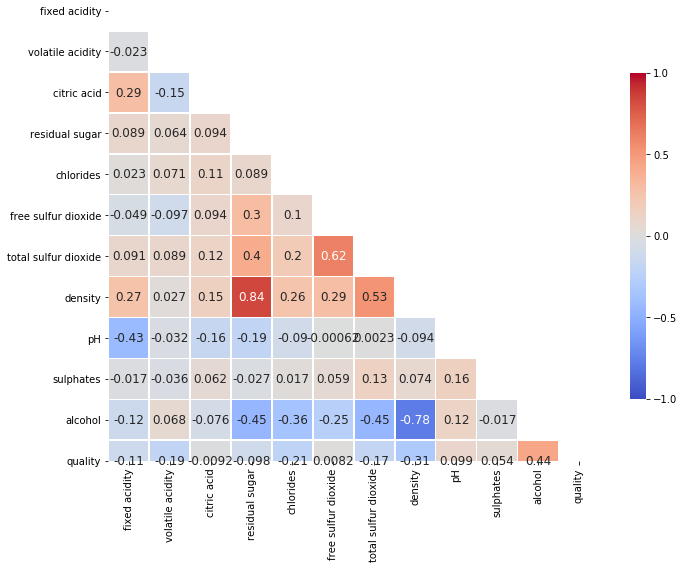

In [136]:
f, ax = plt.subplots(figsize=(11, 15)) 
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [137]:
X=pd.DataFrame(dataset[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [138]:
y=dataset.quality
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [139]:
import sklearn

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)
#X_train = sc.fit_transform(X_train)
X_test=pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns, index=X_test.index)
#X_test = sc.transform(X_test)

#Classifier
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest_class.fit(X_train, y_train)

# Predicting the Test set results
y_pred = forest_class.predict(X_test)
print('Test set score is', forest_class.score(X_test, y_test))
print('Training set score is', forest_class.score(X_train, y_train))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

## seems to overfit. I have tried other classification algorithms.
## Other algorithms are not very well-trained and has training set score of at most~ 0.7
## with test set score of ~0.5



Test set score is 0.6122448979591837
Training set score is 0.9882593159775396
[[  0   1   5   3   0   0]
 [  0   8  25  17   1   0]
 [  0   1 193 100   1   0]
 [  0   1  65 302  40   1]
 [  0   0   6  83  92   2]
 [  0   1   6  10  11   5]]


In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 20], 'max_features': [2, 4, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 10]},
  ]

grid_search = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,error_score=np.nan)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None

In [163]:
print(grid_search.best_params_)
print(grid_search.param_grid)



{'max_features': 2, 'n_estimators': 20}
[{'n_estimators': [5, 10, 20], 'max_features': [2, 4, 8, 10]}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 10]}]


In [164]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7522299671179828 {'max_features': 2, 'n_estimators': 5}
0.7034879919180166 {'max_features': 2, 'n_estimators': 10}
0.6793084193022834 {'max_features': 2, 'n_estimators': 20}
0.741637056265486 {'max_features': 4, 'n_estimators': 5}
0.7235201227643367 {'max_features': 4, 'n_estimators': 10}
0.6877102444315262 {'max_features': 4, 'n_estimators': 20}
0.7571338448449514 {'max_features': 8, 'n_estimators': 5}
0.7153605273024648 {'max_features': 8, 'n_estimators': 10}
0.6871533187811844 {'max_features': 8, 'n_estimators': 20}
0.7599938206674985 {'max_features': 10, 'n_estimators': 5}
0.7155388992108104 {'max_features': 10, 'n_estimators': 10}
0.6886374529481087 {'max_features': 10, 'n_estimators': 20}
0.7544321989602336 {'bootstrap': False, 'max_features': 2, 'n_estimators': 5}
0.7153605273024648 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6945422765867527 {'bootstrap': False, 'max_features': 2, 'n_estimators': 20}
0.7489996732072203 {'bootstrap': False, 'max_features': 4,

In [143]:
#pd.DataFrame(grid_search.cv_results_)

In [165]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [166]:
sorted(zip(feature_importances, list(X)), reverse=True)

[(0.12588658098060962, 'alcohol'),
 (0.10676270730619486, 'density'),
 (0.10051434217869273, 'free sulfur dioxide'),
 (0.08988994458667939, 'volatile acidity'),
 (0.08971109429395513, 'total sulfur dioxide'),
 (0.08813345590706319, 'chlorides'),
 (0.08599691651633765, 'residual sugar'),
 (0.0828565945587, 'citric acid'),
 (0.08171357798774367, 'pH'),
 (0.07739301224296471, 'sulphates'),
 (0.07114177344105906, 'fixed acidity')]

In [168]:
from sklearn.metrics import mean_squared_error
from math import sqrt
final_model = grid_search.best_estimator_


# Predicting the Test set results
y_pred = final_model.predict(X_test)
print('Test set score is', final_model.score(X_test, y_test))
print('Training set score is', final_model.score(X_train, y_train))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)



Test set score is 0.6295918367346939
Training set score is 0.9982133741704952
[[  0   0   6   3   0   0]
 [  0   5  25  21   0   0]
 [  0   0 188 101   6   0]
 [  0   1  52 323  32   1]
 [  0   0   6  82  94   1]
 [  0   0   2  16   8   7]]
